In [6]:
#Author  : Sateesh Kalidas
#Date    : 18/Apr/2020
#Purpose : Linear Regression assignement

#the iris(the flower)dataset attached contains five variables namely,
#1.SepalLength(Cm)
#2.SepalWidth(Cm)
#3.PetalLength(Cm)
#4.PetalWidth(Cm)
#5.Species
#All you need to do is performing Linear Regression in python on this 
#dataset taking Sepal Length as Response or dependent variable and rest
#of the variables as independent ones.
#Before performing Linear Regression please check 
#1.> whether there exists any multicollinearity in the independent 
#variables with correlation matrix and suitable scatter plots.
#2.> find the correlation between dependent variable and each 
#independent variable.
#3.> Find if there is any outlier in the variables given with suitable
#boxplots.
#Give your observed inputs.

In [2]:
#Check if the current working directory matches with location of data-set
import os
os.getcwd()

'C:\\Users\\SK00642740\\SateeshK\\src\\py_utils'

In [3]:
import pandas as pd
df = pd.read_csv('iris.csv')

In [4]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#Collect stats on total missing values across all features.
print(df.isnull().sum())

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64


In [28]:
#Data is clean, so no effort needed further to clean this data-set
#Co-relation between independent variables
df.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


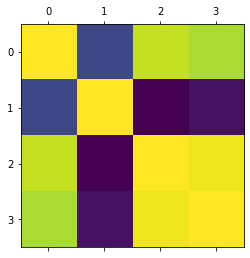

In [31]:
#From above run is can be seen there exists strong co-relation between
#Petal length and Petal Width
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

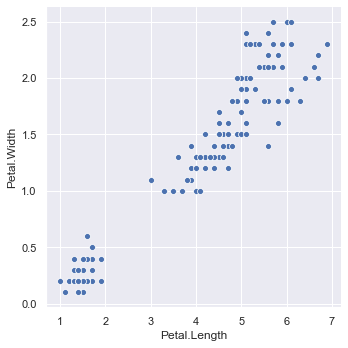

In [32]:
#Scatter plot between Petal length and Petal Width.
import seaborn as sns
import os
sns.set(style='darkgrid')
flower_specs = sns.load_dataset("Iris",data_home=os.path.dirname(os.path.abspath("Iris")))

#Scatter plot to check co-relation among dependant varibales.
#Petal length vs Width which is expected to have a positive cor-relation
sns.relplot(x='Petal.Length', y='Petal.Width', data = flower_specs)

In [13]:
from sklearn import linear_model

In [16]:
#Seperate dependant vs. independent variables
X = df[['Sepal.Width','Petal.Length','Petal.Width']]
print(X)
y = df[['Sepal.Length']]

     Sepal.Width  Petal.Length  Petal.Width
0            3.5           1.4          0.2
1            3.0           1.4          0.2
2            3.2           1.3          0.2
3            3.1           1.5          0.2
4            3.6           1.4          0.2
..           ...           ...          ...
145          3.0           5.2          2.3
146          2.5           5.0          1.9
147          3.0           5.2          2.0
148          3.4           5.4          2.3
149          3.0           5.1          1.8

[150 rows x 3 columns]


In [17]:
#Initialize the linear model
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [24]:
#Now predict the Sepal.Length for a given value of dependant variables.
print(X[0:1])
predictions = lm.predict(X[0:1])
print(predictions)

   Sepal.Width  Petal.Length  Petal.Width
0          3.5           1.4          0.2
[[5.01541576]]


In [25]:
#Print R2 value
lm.score(X,y)

0.8586117200663178

In [26]:
#Value of slope, this will return a list of values due to more than one independent variable.
lm.coef_

array([[ 0.65083716,  0.70913196, -0.55648266]])

In [27]:
#Y-intercept value is
lm.intercept_

array([1.85599749])

In [ ]:
#Find the null hypothesis